In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate random data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random data points between 0 and 10
y = 3 - 0.5 * X + 0.4 * X**2 + np.random.randn(100, 1) * 2  # Quadratic relationship with noise

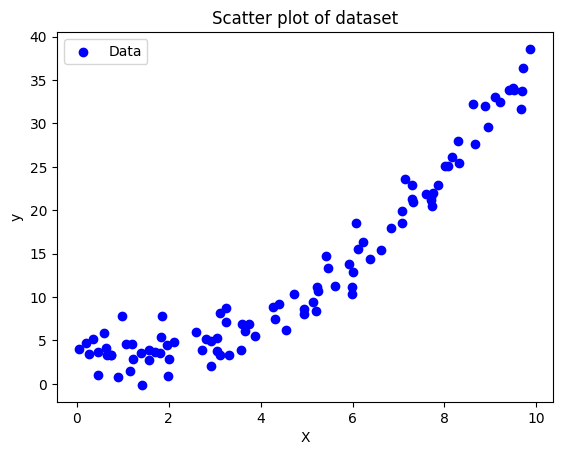

In [4]:
# Visualize the data
plt.scatter(X, y, color='blue', label='Data')
plt.title('Scatter plot of dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Define the polynomial degree
degree = 2

In [7]:
# Transform data into polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [8]:
# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [9]:
# Predict on the training data
y_pred = model.predict(X_poly)

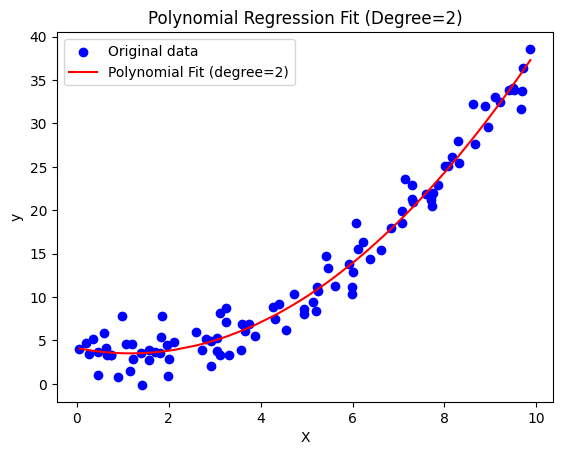

In [10]:
# Flatten y_pred to match X's shape
y_pred_flat = y_pred.flatten()

# Visualize the fit
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(np.sort(X, axis=0), y_pred_flat[np.argsort(X, axis=0).flatten()], color='red', label=f'Polynomial Fit (degree={degree})')
plt.title(f'Polynomial Regression Fit (Degree={degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [11]:
print("Shapes:")
print(f"X: {X.shape}")
print(f"y_pred: {y_pred.shape}")
print(f"y_pred_flat: {y_pred_flat.shape}")


Shapes:
X: (100, 1)
y_pred: (100, 1)
y_pred_flat: (100,)


In [12]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Model Performance:\nMean Squared Error (MSE): {mse:.2f}\nR-squared (R²): {r2:.2f}")

Model Performance:
Mean Squared Error (MSE): 3.11
R-squared (R²): 0.97


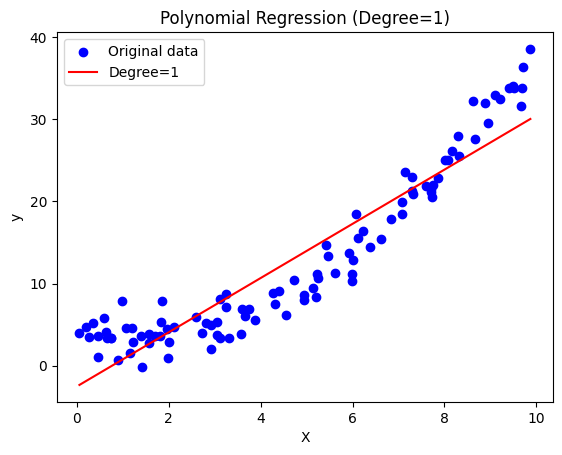

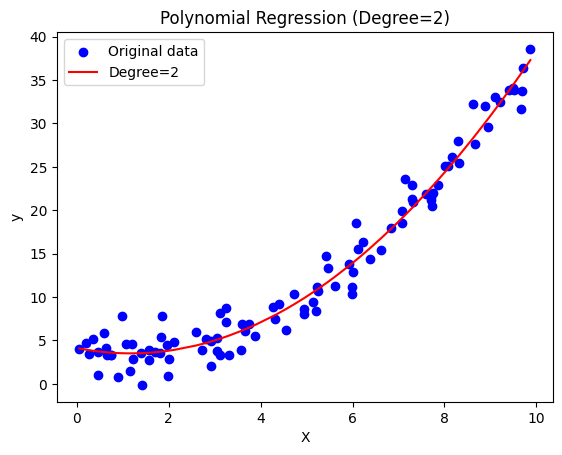

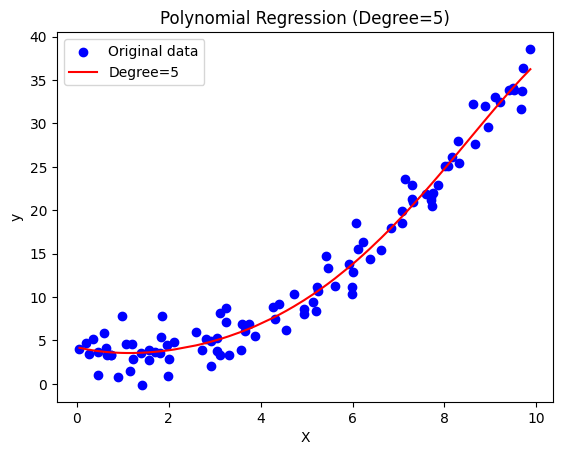

In [13]:
# Experiment with degrees
for degree in [1, 2, 5]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Flatten y_pred and sort both X and y_pred for plotting
    X_sorted = np.sort(X, axis=0)
    y_pred_sorted = y_pred[np.argsort(X, axis=0).flatten()].flatten()

    plt.scatter(X, y, color='blue', label='Original data')
    plt.plot(X_sorted, y_pred_sorted, label=f'Degree={degree}', color='red')
    plt.title(f'Polynomial Regression (Degree={degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
